# Sentiment analysis

- IMDB sentiment analysis problem for NLP
- word embedding in Keras for NLP problem
- evaluate a Multilaye Perceptron model for IMDB problem
- 1d convolutional neural network model for IMDB problem

# 1.Movie review sentiment classification dataset

[Sentiment Analysis](http://ai.stanford.edu/~amaas/data/sentiment/)  

[wvSent_acl2011.pdf](http://ai.stanford.edu/~amaas/papers/wvSent_acl2011.pdf)

# 2.Load data with Keras

In [1]:
import numpy as np
from keras.datasets import imdb
import matplotlib.pyplot as plt

# load data
(X_train, y_train), (X_test, y_test) = imdb.load_data()

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

Using Theano backend.


17448960/17464789 [============================>.] - ETA: 0s  

In [2]:
# summarize size
print("Training data: ")
print(X.shape)
print(y.shape)

Training data: 
(50000L,)
(50000L,)


In [3]:
# Number of class
print("Classes: ")
print(np.unique(y))

Classes: 
[0 1]


In [7]:
X[0: 2]

array([ list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 

In [8]:
np.hstack(X[0: 5])

array([  1,  14,  22, ...,   7,  61, 113])

In [9]:
# Summarize number of words
print("Number of words: ")
print(len(np.unique(np.hstack(X))))

Number of words: 
88585


Review lenght: 
Mean 234.75892 words (172.911494587)


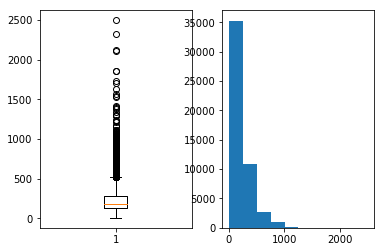

In [10]:
# Summarize review length
print("Review lenght: ")
result = map(len, X)

print("Mean {0} words ({1})".format(np.mean(result), np.std(result)))

# Plot
plt.subplot(121)
plt.boxplot(result)
plt.subplot(122)
plt.hist(result)
plt.show()

# 3.word embeddings

In [12]:
imdb.load_data(nb_words=5000)

D:\ProgramData\Anaconda2\lib\site-packages\keras\datasets\imdb.py:45: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '


((array([ list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
         list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 

In [13]:
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

NameError: name 'sequence' is not defined

# 4 Simple MLP mode

In [14]:
# MLP for IMDB problem

import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense

from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

seed = 7
np.random.seed(seed)

# only keep top n words, zero the rest
top_words = 5000
test_split = 0.33
(X_train, y_train), (X_train, y_test) = imdb.load_data(nb_words = top_words)

max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [18]:
# model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
# fit
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=2, batch_size=128,
         verbose=1)
# final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {}%".format(scores[1]*100))

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
24960/25000 [============================>.] - ETA: 0s - loss: 0.5431 - acc: 0.6722 

IndexError: index 20201 is out of bounds for size 5000
Apply node that caused the error: AdvancedSubtensor1(embedding_2/embeddings, Elemwise{Cast{int32}}.0)
Toposort index: 17
Inputs types: [TensorType(float32, matrix), TensorType(int32, vector)]
Inputs shapes: [(5000L, 32L), (64000L,)]
Inputs strides: [(128L, 4L), (4L,)]
Inputs values: ['not shown', 'not shown']
Outputs clients: [[Reshape{2}(AdvancedSubtensor1.0, MakeVector{dtype='int64'}.0)]]

Backtrace when the node is created(use Theano flag traceback.limit=N to make it longer):
  File "D:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "D:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "D:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-18-fe1822eed862>", line 3, in <module>
    model.add(Embedding(top_words, 32, input_length=max_words))
  File "D:\ProgramData\Anaconda2\lib\site-packages\keras\models.py", line 436, in add
    layer(x)
  File "D:\ProgramData\Anaconda2\lib\site-packages\keras\engine\topology.py", line 596, in __call__
    output = self.call(inputs, **kwargs)
  File "D:\ProgramData\Anaconda2\lib\site-packages\keras\layers\embeddings.py", line 134, in call
    out = K.gather(self.embeddings, inputs)
  File "D:\ProgramData\Anaconda2\lib\site-packages\keras\backend\theano_backend.py", line 458, in gather
    y = reference[indices]

HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

In [23]:
# MLP for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=2, batch_size=128,
verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_3 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None
Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 25s - loss: 0.5449 - acc: 0.6813 - val_loss: 0.3287 - val_acc: 0.8571

# CNN

In [24]:
# CNN for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words)
# pad dataset to a maximum review length in words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Convolution1D(nb_filter=32, filter_length=3, border_mode='same',
activation='relu'))
model.add(MaxPooling1D(pool_length=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=2, batch_size=128,
verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

D:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:25: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", padding="same", filters=32, kernel_size=3)`
D:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:26: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
_________________________________________________________________
